## Introduction on Multi-Layer Perceptron and CNN
### Task: Digits classification
### Dataset: MNIST dataset

## Let's install and import necessary packages

1. Data preparation
2. Network archtecute
3. model trainng
4. Model evalualtion

In [1]:
!pip install torch-summary

In [2]:
from torchsummary import summary
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [3]:
# device - CPU or GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device: ", device)

Device:  cpu


## Get data and building dataset

In [5]:
!mkdir "data"

In [6]:
TrainDataset = datasets.MNIST(root='./data', train=True, download=True)
TestDataset = datasets.MNIST(root='./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 82542588.36it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 64025208.15it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21394670.42it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5150183.50it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
print(f'lenght of train dataset:{len(TrainDataset)}')
print(f'lenght of test dataset:{len(TestDataset)}')
TrainDataset[0][0]
# print(f'Image shape at idx 0:{TrainDataset[0][0].shape}-> corresponding label:{TrainDataset[0][1]}')

lenght of train dataset:60000
lenght of test dataset:10000


In [8]:
TrainDataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([
                           transforms.ToTensor()]))
TestDataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([
                           transforms.ToTensor()]))


In [9]:
classes = TrainDataset.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [10]:
TrainDataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [11]:
TestDataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

## Visualize

lenght of train dataset:60000
lenght of test dataset:10000
Image shape at idx 0:torch.Size([1, 28, 28])-> corresponding label:5
Idx:10891-> Img shape:torch.Size([28, 28, 1]) -> Label:5
Idx:43065-> Img shape:torch.Size([28, 28, 1]) -> Label:3
Idx:6887-> Img shape:torch.Size([28, 28, 1]) -> Label:4
Idx:44570-> Img shape:torch.Size([28, 28, 1]) -> Label:7


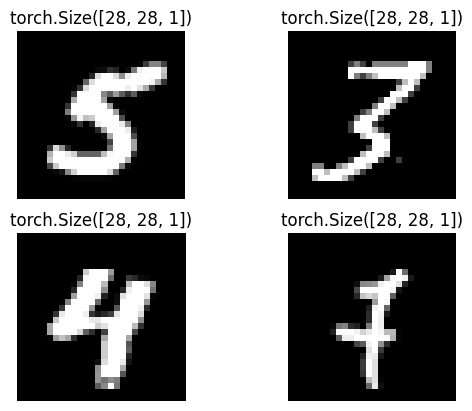

In [12]:
print(f'lenght of train dataset:{len(TrainDataset)}')
print(f'lenght of test dataset:{len(TestDataset)}')
print(f'Image shape at idx 0:{TrainDataset[0][0].shape}-> corresponding label:{TrainDataset[0][1]}')

# Selecting randomly from the train dataset and visualize

Random_idx = torch.randint(0, len(TrainDataset)-1, (4,))


plt.subplot(2, 2, 1)
img=TrainDataset[Random_idx[0]][0].permute(1,2,0)
print(f'Idx:{Random_idx[0]}-> Img shape:{img.shape} -> Label:{TrainDataset[Random_idx[0]][1]}')
plt.imshow(img,cmap='gray')
plt.title(f'{img.shape}')
plt.axis(False);

plt.subplot(2, 2, 2)
img=TrainDataset[Random_idx[1]][0].permute(1,2,0)
print(f'Idx:{Random_idx[1]}-> Img shape:{img.shape} -> Label:{TrainDataset[Random_idx[1]][1]}')
plt.imshow(img,cmap='gray')
plt.title(f'{img.shape}')
plt.axis('off');

plt.subplot(2, 2, 3)
img=TrainDataset[Random_idx[2]][0].permute(1,2,0)
print(f'Idx:{Random_idx[2]}-> Img shape:{img.shape} -> Label:{TrainDataset[Random_idx[2]][1]}')
plt.imshow(img,cmap='gray')
plt.title(f'{img.shape}')
plt.axis('off');

plt.subplot(2, 2, 4)
img=TrainDataset[Random_idx[3]][0].permute(1,2,0)
print(f'Idx:{Random_idx[3]}-> Img shape:{img.shape} -> Label:{TrainDataset[Random_idx[3]][1]}')
plt.imshow(img,cmap='gray')
plt.title(f'{img.shape}')
plt.axis('off');

In [13]:
# reshaping
img_reshape = TrainDataset[0][0].reshape(-1)
img_reshape.shape

torch.Size([784])

## Building dataloader using built-in function

In [15]:
train_loader = torch.utils.data.DataLoader(TrainDataset, batch_size=6000, shuffle=True)
test_loader = torch.utils.data.DataLoader(TestDataset,batch_size=6000, shuffle=True)
print('Done !!')

Done !!


In [16]:
len(train_loader),len(test_loader)

(10, 2)

In [17]:
# Checking the dataloader
for i, data in enumerate(train_loader):

  digits_img, labels = data
  print(digits_img.shape, labels.shape)
  break

torch.Size([6000, 1, 28, 28]) torch.Size([6000])


## Building model network

### 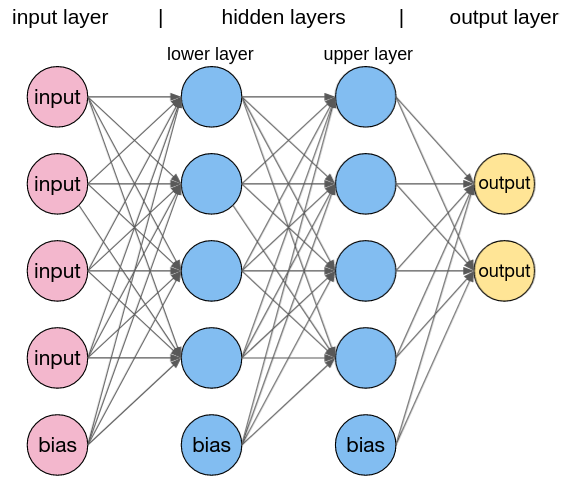

In [18]:

class MLP_Net(nn.Module):
    def __init__(self,inputsize, outputsize):
        super(MLP_Net, self).__init__()
        #input image dimensions: 1x28x28=784
        self.fc1 = nn.Linear(inputsize , 600 )

        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(600,600)

        # Block of sequential layers
        self.block_seq=nn.Sequential(
            nn.ReLU(),
            nn.Linear(600,600),
            nn.ReLU(),
            nn.Linear(600,600),
            nn.ReLU()
        )

        self.fc3 = nn.Linear(600,outputsize)

    # Forward function to construct a network
    def forward(self, x):
      input = self.fc1(x)
      input = self.relu(input)
      output = self.fc2(input)
      output = self.block_seq(output)
      output = self.fc3(output)
      return output

In [19]:
# Model summay
# Define input and output sizes
input_size = 784  # each input image is 28x28
output_size = 10  # there are 10 output classes for our dataset

# Model object, instance
model = MLP_Net(input_size, output_size)

# Printing model summary
summary(model, (input_size,))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 600]                 471,000
├─ReLU: 1-2                              [-1, 600]                 --
├─Linear: 1-3                            [-1, 600]                 360,600
├─Sequential: 1-4                        [-1, 600]                 --
|    └─ReLU: 2-1                         [-1, 600]                 --
|    └─Linear: 2-2                       [-1, 600]                 360,600
|    └─ReLU: 2-3                         [-1, 600]                 --
|    └─Linear: 2-4                       [-1, 600]                 360,600
|    └─ReLU: 2-5                         [-1, 600]                 --
├─Linear: 1-5                            [-1, 10]                  6,010
Total params: 1,558,810
Trainable params: 1,558,810
Non-trainable params: 0
Total mult-adds (M): 2.28
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 5.95
Estimated Total S

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 600]                 471,000
├─ReLU: 1-2                              [-1, 600]                 --
├─Linear: 1-3                            [-1, 600]                 360,600
├─Sequential: 1-4                        [-1, 600]                 --
|    └─ReLU: 2-1                         [-1, 600]                 --
|    └─Linear: 2-2                       [-1, 600]                 360,600
|    └─ReLU: 2-3                         [-1, 600]                 --
|    └─Linear: 2-4                       [-1, 600]                 360,600
|    └─ReLU: 2-5                         [-1, 600]                 --
├─Linear: 1-5                            [-1, 10]                  6,010
Total params: 1,558,810
Trainable params: 1,558,810
Non-trainable params: 0
Total mult-adds (M): 2.28
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 5.95
Estimated Total S

## Defining optimizer and cost function import torch.optim as optim



In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr= 0.1, momentum=0.9)


In [21]:
# sendin the model to device
model.to(device=device)

MLP_Net(
  (fc1): Linear(in_features=784, out_features=600, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=600, out_features=600, bias=True)
  (block_seq): Sequential(
    (0): ReLU()
    (1): Linear(in_features=600, out_features=600, bias=True)
    (2): ReLU()
    (3): Linear(in_features=600, out_features=600, bias=True)
    (4): ReLU()
  )
  (fc3): Linear(in_features=600, out_features=10, bias=True)
)

## Model training

In [22]:
#set number of epochs to three
epochs =15

#set the net to training mode
model.train()

for e in range(epochs): #takes around a minute per epoch
    running_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        #reshape to be a 1 by 784 tensor
        image_shape=data.shape # ([B C H W])
        data, target = data.reshape(image_shape[0],image_shape[-2]*image_shape[-1]).to(device=device), target.to(device=device)

        #manually set gradient to zero
        optimizer.zero_grad()

        #pass input through net to get output
        output = model(data)

        #calculate loss
        loss = criterion(output, target)

        #backpropogate to update gradients
        loss.backward()
        optimizer.step()

        #add loss value to the running_loss
        running_loss += loss.item()
    print(f'Epoch number: {e} | Loss:{round(running_loss/len(train_loader),3)}')
print('Training, Done!')

Epoch number: 0 | Loss:2.3
Epoch number: 1 | Loss:2.284
Epoch number: 2 | Loss:2.221
Epoch number: 3 | Loss:1.74
Epoch number: 4 | Loss:3.409
Epoch number: 5 | Loss:2.109
Epoch number: 6 | Loss:1.97
Epoch number: 7 | Loss:1.762
Epoch number: 8 | Loss:1.648
Epoch number: 9 | Loss:1.448
Epoch number: 10 | Loss:0.985
Epoch number: 11 | Loss:0.666
Epoch number: 12 | Loss:0.5
Epoch number: 13 | Loss:0.393
Epoch number: 14 | Loss:0.318
Training, Done!


## Model evaluation


In [24]:
# Set model to evaluation model
model.eval()

#initalize correct_count to zero
correct_count = 0
with torch.no_grad():
  #iterate through test dataset
  for images, labels in test_loader:
      #reshape to be 1x784
      image_shape=images.shape
      images = images.reshape(image_shape[0],image_shape[-2]*image_shape[-1]).to(device=device)
      labels = labels.to(device=device)

      #calculate output from net
      output = model(images)

      #use softmax to convert to probabilities
      prob = F.softmax(output, dim=1)

      #find the index with the greatest probability, set that as predicted label
      pred_label = prob.argmax(dim=1, keepdim=True)
      print(pred_label.shape)
      print(labels.shape)

      pred_label = pred_label.squeeze()
      print(pred_label)
      print(labels)


      #compare the predicted label to the actual label
      correct_count += (pred_label == labels).sum().item()

accuracy = correct_count / len(test_loader.dataset)
print("The calculated accuracy is:", accuracy)

torch.Size([6000, 1])
torch.Size([6000])
tensor([2, 6, 8,  ..., 1, 7, 4])
tensor([2, 6, 1,  ..., 1, 7, 4])
torch.Size([4000, 1])
torch.Size([4000])
tensor([1, 0, 7,  ..., 1, 3, 4])
tensor([1, 0, 7,  ..., 8, 3, 4])
The calculated accuracy is: 0.9172


In [26]:
# Image for prediction
imag=TrainDataset[188][0]
imag.shape

torch.Size([1, 28, 28])

Input image shape:torch.Size([1, 28, 28])
The probabilities:
 tensor([[6.1005e-04, 4.4250e-04, 6.2154e-02, 5.3545e-03, 7.0971e-03, 1.5868e-02,
         1.6517e-03, 3.7495e-05, 8.9449e-01, 1.2293e-02]],
       grad_fn=<SoftmaxBackward0>)
Guess: 8


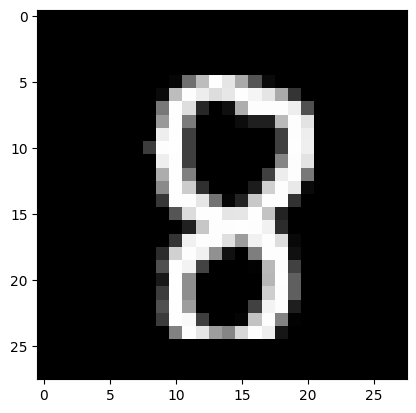

In [27]:

# Convert to array
myImage=imag
print(f'Input image shape:{myImage.shape}')
digit = np.asarray(myImage, dtype=np.float32)
#numpy to tensor
digit = torch.from_numpy(digit)

# reshape to a single feature vector, you can also use flatten function
digit = digit.reshape(1, 784).to(device=device)

#run input through net to get output
output = model(digit)
#use softmax to cnovert into probability
prob = F.softmax(output, dim=1)
print("The probabilities:\n", prob)
#find the index with the largest probability
pred_label = prob.argmax(dim=1, keepdim=True)

print("Guess:", pred_label.item())

plt.imshow(myImage.permute(1,2,0),cmap='gray');

